In [1]:
import pandas as pd
import numpy as np
import wrangle_model
import wrangle
import matplotlib.pyplot as plt
from pydataset import data

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

In [5]:
df = pd.read_csv('tips.csv')
# total bill / party size
df['price_per_person'] = df.total_bill / df['size']
# split that data!
train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=1349)
train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=1349)
X_train, y_train = train.drop(columns='tip'), train[['tip']]
X_validate,y_validate = validate.drop(columns=['tip']),validate[['tip']]
X_test,y_test = test.drop(columns=['tip']), test[['tip']]

# initialize two empty lists
num_cols, cat_cols = [], []
# for every i in X_train's columns:
for i in X_train.columns:
    # If that thing (inside that series) is a number
    if np.issubdtype(X_train[i], np.number):
        #and if it has over 5 elements
        if X_train[i].value_counts().shape[0] > 5:
            #then we'll put that column name in an appropriate list
            num_cols.append(i)
        else:
            cat_cols.append(i)
    else:
        #otherwise its probably an object
        cat_cols.append(i)
X_train[[f'{i}_scaled' for i in num_cols]] = MinMaxScaler(
).fit_transform(X_train[num_cols])
X_train = pd.concat([X_train,pd.get_dummies(X_train[cat_cols], drop_first=True)],
                    axis=1)

# initialize two empty lists
num_cols, cat_cols = [], []
# for every i in X_train's columns:
for i in X_validate.columns:
    # If that thing (inside that series) is a number
    if np.issubdtype(X_validate[i], np.number):
        #and if it has over 5 elements
        if X_validate[i].value_counts().shape[0] > 5:
            #then we'll put that column name in an appropriate list
            num_cols.append(i)
        else:
            cat_cols.append(i)
    else:
        #otherwise its probably an object
        cat_cols.append(i)
X_validate[[f'{i}_scaled' for i in num_cols]] = MinMaxScaler(
).fit_transform(X_validate[num_cols])
X_validate = pd.concat([X_validate,pd.get_dummies(X_validate[cat_cols], drop_first=True)],
                    axis=1)

# initialize two empty lists
num_cols, cat_cols = [], []
# for every i in X_train's columns:
for i in X_test.columns:
    # If that thing (inside that series) is a number
    if np.issubdtype(X_test[i], np.number):
        #and if it has over 5 elements
        if X_test[i].value_counts().shape[0] > 5:
            #then we'll put that column name in an appropriate list
            num_cols.append(i)
        else:
            cat_cols.append(i)
    else:
        #otherwise its probably an object
        cat_cols.append(i)
X_test[[f'{i}_scaled' for i in num_cols]] = MinMaxScaler(
).fit_transform(X_test[num_cols])
X_test = pd.concat([X_test,pd.get_dummies(X_test[cat_cols], drop_first=True)],
                    axis=1)

modeling_feats = ['total_bill_scaled',
 'price_per_person_scaled',
 'sex_Male',
 'smoker_Yes',
 'day_Sat',
 'day_Sun',
 'day_Thur',
 'time_Lunch']


In [7]:
X_train = X_train[modeling_feats]
X_validate = X_validate[modeling_feats]
X_test = X_test[modeling_feats]

In [17]:
X_train.shape, X_validate.shape, X_test.shape

((136, 8), (59, 8), (49, 8))

In [8]:
X_train.head()

,total_bill_scaled,price_per_person_scaled,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
51,0.100755,0.130460,0,0,0,1,0,0
46,0.365735,0.473563,1,0,0,1,0,0
107,0.431869,0.559195,1,1,1,0,0,0
86,0.161562,0.209195,1,0,0,0,1,1
58,0.121838,0.157759,1,1,1,0,0,0


In [9]:
X_validate.head()

,total_bill_scaled,price_per_person_scaled,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
64,0.320813,0.196092,1,0,1,0,0,0
203,0.294521,0.360126,0,1,0,0,1,1
23,0.803137,0.476307,1,0,1,0,0,0
78,0.435042,0.583363,1,0,0,0,1,1
216,0.554132,0.179712,1,1,1,0,0,0


In [12]:
y_validate.head()

,tip
64,2.64
203,2.50
23,7.58
78,3.00
216,3.00


### we do this now lets look at distribution of target

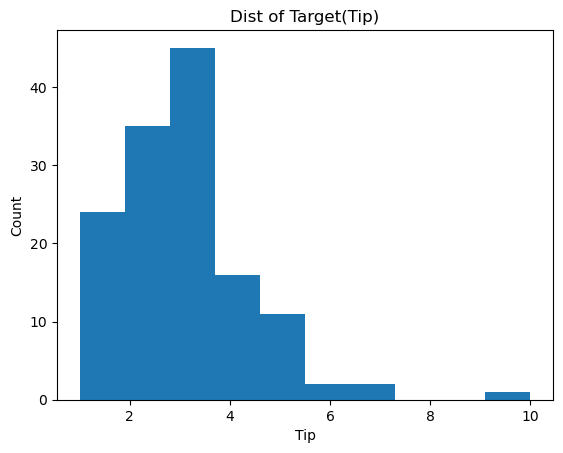

In [18]:
plt.hist(y_train)
plt.title('Dist of Target(Tip)')
plt.xlabel("Tip")
plt.ylabel("Count")

plt.show()

In [19]:
# convert y_targets into dataframe so that we can append additional columns to it
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [20]:
# 1. Predict TIP_pred_mean
tip_pred_mean = y_train.tip.mean()
y_train['tip_pred_mean'] = tip_pred_mean
y_validate['tip_pred_mean'] = tip_pred_mean

In [21]:
y_train.head()

,tip,tip_pred_mean
51,2.60,2.993088
46,5.00,2.993088
107,4.29,2.993088
86,2.00,2.993088
58,1.76,2.993088


In [22]:
# 2. compute tip_pred_median
tip_pred_median = y_train.tip.median()
y_train['tip_pred_median'] = tip_pred_median
y_validate['tip_pred_median'] = tip_pred_median

In [23]:
y_train.head()

,tip,tip_pred_mean,tip_pred_median
51,2.60,2.993088,3.0
46,5.00,2.993088,3.0
107,4.29,2.993088,3.0
86,2.00,2.993088,3.0
58,1.76,2.993088,3.0


In [24]:
# COMPARE mu and median
rmse_train_mu = mean_squared_error(y_train.tip,
                                y_train.tip_pred_mean) ** .5

rmse_validate_mu = mean_squared_error(y_validate.tip, y_validate.tip_pred_mean) ** (0.5)

rmse_train_med = mean_squared_error(y_train.tip, y_train.tip_pred_median) ** .5
rmse_validate_med = mean_squared_error(y_validate.tip, y_validate.tip_pred_median) ** (0.5)

print(f"""RMSE using Mean
Train/In-Sample: {round(rmse_train_mu, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_mu, 2)}""")

print(f"""RMSE using Median
Train/In-Sample: {round(rmse_train_med, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_med, 2)}""")

# We actually want to use the MEDIAN 1.57 vs 1.58

RMSE using Mean
Train/In-Sample: 1.34 
Validate/Out-of-Sample: 1.58
RMSE using Median
Train/In-Sample: 1.34 
Validate/Out-of-Sample: 1.57


In [25]:
# build a quick df to compare results...will append to this df as needed
metric_df = pd.DataFrame(data=[
    {'model': 'median_baseline',
     'RMSE_train': rmse_train_med,
     'RMSE_validate': rmse_validate_med,
     'R2_validate': explained_variance_score(y_validate.tip,
                                             y_validate.tip_pred_median)
    }
]
)

In [26]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,median_baseline,1.341078,1.57429,2.220446e-16


### Lets see OLS model

In [27]:
# MAKE THE THING: create the model object
lm = LinearRegression()

#1. FIT THE THING: fit the model to training data
OLSmodel = lm.fit(X_train, y_train.tip)

#2. USE THE THING: make a prediction
y_train['tip_pred_lm'] = lm.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_lm)**(1/2)

# 4. REPEAT STEPS 2-3 for validate

# predict validate
y_validate['tip_pred_lm'] = lm.predict(X_validate)


# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_lm)**(1/2)


print(f"""RMSE for OLS using LinearRegression
Training/In-Sample:  {rmse_train} 
Validation/Out-of-Sample: {rmse_validate}""")

RMSE for OLS using LinearRegression
Training/In-Sample:  1.003695289248333 
Validation/Out-of-Sample: 0.9338654516592251


In [29]:
y_train.head()

,tip,tip_pred_mean,tip_pred_median,tip_pred_lm
51,2.60,2.993088,3.0,2.226460
46,5.00,2.993088,3.0,3.287963
107,4.29,2.993088,3.0,3.394910
86,2.00,2.993088,3.0,2.301912
58,1.76,2.993088,3.0,2.219685


In [30]:
#Append this to the metric_df

metric_df = metric_df.append(
    {'model': 'OLS Regressor',
     'RMSE_train': rmse_train,
     'RMSE_validate': rmse_validate,
     'R2_validate': explained_variance_score(y_validate.tip,
                                             y_validate.tip_pred_lm)
    }, ignore_index=True)

/var/folders/ty/2pnn6wsj06n_glzjgbmxzlkw0000gn/T/ipykernel_2314/3260298468.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df = metric_df.append(


In [31]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,median_baseline,1.341078,1.574290,2.220446e-16
1,OLS Regressor,1.003695,0.933865,6.583177e-01


In [35]:
#take a look under the hood 
coef_df = pd.DataFrame({'cols':X_train.columns,
              'OLScoef':OLSmodel.coef_})

In [36]:
coef_df

,cols,OLScoef
0,total_bill_scaled,4.728668
1,price_per_person_scaled,-0.724420
2,sex_Male,0.057052
3,smoker_Yes,0.156901
4,day_Sat,0.024976
5,day_Sun,0.325622
6,day_Thur,0.233719
7,time_Lunch,-0.120199


### Now L1

In [37]:
# MAKE THE THING: create the model object
lars = LassoLars(alpha=0.01)

#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.tip)

#2. USE THE THING: make a prediction
y_train['tip_pred_lars'] = lars.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_lars) ** (1/2)

#4. REPEAT STEPS 2-3

# predict validate
y_validate['tip_pred_lars'] = lars.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_lars) ** (1/2)

print(f"""RMSE for Lasso + Lars
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

RMSE for Lasso + Lars
_____________________
Training/In-Sample: 1.0208385071087447, 
Validation/Out-of-Sample:  0.9657101995482704
Difference:  -0.055128307560474266


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [38]:
#Append this to the metric_df

metric_df = metric_df.append(
    {'model': 'LASSO_alpha01',
     'RMSE_train': rmse_train,
     'RMSE_validate': rmse_validate,
     'R2_validate': explained_variance_score(y_validate.tip,
                                             y_validate.tip_pred_lars)
    }, ignore_index=True)

/var/folders/ty/2pnn6wsj06n_glzjgbmxzlkw0000gn/T/ipykernel_2314/3165586441.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df = metric_df.append(


In [39]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,median_baseline,1.341078,1.574290,2.220446e-16
1,OLS Regressor,1.003695,0.933865,6.583177e-01
2,LASSO_alpha01,1.020839,0.965710,6.583177e-01


In [40]:
lars.coef_

array([3.87163419, 0.        , 0.        , 0.        , 0.        ,
       0.06128238, 0.        , 0.        ])

In [41]:
#take a look under the hood 
lars_df = pd.DataFrame({
              'LARScoef':lars.coef_})

In [42]:
coef_df = pd.concat([coef_df,lars_df],ignore_index=True,axis=1)

In [43]:
coef_df

,0,1,2
0,total_bill_scaled,4.728668,3.871634
1,price_per_person_scaled,-0.724420,0.000000
2,sex_Male,0.057052,0.000000
3,smoker_Yes,0.156901,0.000000
4,day_Sat,0.024976,0.000000
5,day_Sun,0.325622,0.061282
6,day_Thur,0.233719,0.000000
7,time_Lunch,-0.120199,0.000000


## Now GLM

In [44]:
# MAKE THE THING: create the model object
glm = TweedieRegressor(power=1, alpha=0)

#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!
glm.fit(X_train, y_train.tip)

#2. USE THE THING: make a prediction
y_train['tip_pred_glm'] = glm.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tip, y_train.tip_pred_glm) ** (1/2)

#4. REPEAT STEPS 2-3

# predict validate
y_validate['tip_pred_glm'] = glm.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tip, y_validate.tip_pred_glm) ** (1/2)\

print(f"""RMSE for GLM using Tweedie, power=1 & alpha=0
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

RMSE for GLM using Tweedie, power=1 & alpha=0
_____________________
Training/In-Sample: 1.034023158000185, 
Validation/Out-of-Sample:  0.910653979398716
Difference:  -0.12336917860146912


In [45]:
#Append this to the metric_df

metric_df = metric_df.append(
    {'model': 'GLM_power1',
     'RMSE_train': rmse_train,
     'RMSE_validate': rmse_validate,
     'R2_validate': explained_variance_score(y_validate.tip,
                                             y_validate.tip_pred_glm)
    }, ignore_index=True)

/var/folders/ty/2pnn6wsj06n_glzjgbmxzlkw0000gn/T/ipykernel_2314/4050999740.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df = metric_df.append(


In [46]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,median_baseline,1.341078,1.574290,2.220446e-16
1,OLS Regressor,1.003695,0.933865,6.583177e-01
2,LASSO_alpha01,1.020839,0.965710,6.583177e-01
3,GLM_power1,1.034023,0.910654,6.726286e-01


In [47]:
#take a look under the hood 
glm_df = pd.DataFrame({
              'GLMcoef':glm.coef_})

In [48]:
coef_df = pd.concat([coef_df,glm_df],ignore_index=True,axis=1)

In [52]:
coef_df.rename(columns={0:'features',1:'OLS',2:'LARS',3:'GLM'})

,features,OLS,LARS,GLM
0,total_bill_scaled,4.728668,3.871634,1.305864
1,price_per_person_scaled,-0.724420,0.000000,-0.152593
2,sex_Male,0.057052,0.000000,0.015806
3,smoker_Yes,0.156901,0.000000,0.043735
4,day_Sat,0.024976,0.000000,0.005477
5,day_Sun,0.325622,0.061282,0.106822
6,day_Thur,0.233719,0.000000,0.095761
7,time_Lunch,-0.120199,0.000000,-0.068971
